In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [2]:
#범주형 데이터 확인하기

import os
#이 파일은 열 이름을 나타내는 헤더가 없다. names 매개변수로 열 이름을 제공한다.

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, 'adult.data'),
    header=None, index_col=False,
    names=['age','workclass','fnlwgt','education','deucation-num','marital-status','occupation','relationship','race',
          'gender','capital-gain','capital-loss','house-per-week','native-country','income'])

#예제 출력을 위해 몇개의 열만 선택.
data = data[['age','workclass','education','gender','house-per-week','occupation','income']]
#Ipython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만들어 준다.
display(data.head())

,age,workclass,education,gender,house-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
#value_counts() 함수를 이용해서 열의 내용 확인하기
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

#연속형 데이터인 age 와 house-per-week는 그대로 지만 그 외 범주형 특성은 값마다 새로운 특성으로 확장된 것을 알 수 있다.

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'house-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'house-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [5]:
display(data_dummies.head())

,age,house-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
#특성 범위 지정해주기. 첫 특성인 age부터 occupation 의 transport-moving 까지.
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

#Numpy 배열 추출
X= features.values
y = data_dummies['income_ >50K'].values
print("X.shape:{} y.shape:{}".format(X.shape,y.shape))

X.shape:(32561, 44) y.shape:(32561,)


In [7]:
# 범주형 데이터를 기존에 사용하던 데이터셋으로 변형했으므로 모듈에 적용해보기

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train,y_train)

print("테스트 점수: {:.2f}".format(logreg.score(X_test,y_test)))

테스트 점수: 0.81


In [8]:
demo_df = pd.DataFrame({'숫자 특성':[0,1,2,1],
                       '범주형 특성': ['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [9]:
#padnas의 get_dummies 는 숫자형 특성은 연속형 데이터라고 생각해 가변수를 만들지 않는다.
#아래 표를 보면 숫자 특성은 그대로 나온 것을 볼 수 있고 범주형 특성인 양말과 여우 상자는 각각의 가변수가 생성되었다.
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [10]:
#숫자 특성에도 가변수를 만들고 싶다면 columns 인자에 인고딩하고 싶은 열을 명시하면 된다.
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성','범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [11]:
#OneHotEncoder 사용하기

from sklearn.preprocessing import OneHotEncoder
#sparse = False 로 설정하면 OneHotEncoder가 희소 행렬이 아니라 넘파이 배열을 반환한다.
ohe = OneHotEncoder(sparse=True)
print(ohe.fit_transform(demo_df),'\n')

ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

  (0, 0)	1.0
  (0, 4)	1.0
  (1, 1)	1.0
  (1, 5)	1.0
  (2, 2)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (3, 3)	1.0 

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [12]:
#변환된 특성에 해당하는 원본 범주형 변수 이름얻기
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


In [13]:
display(data.head())

,age,workclass,education,gender,house-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [14]:
#연속형 데이터와 범주형 데이터는 다른 종류의 전처리 과정이 필요하다.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#ColumnTransformer은 각 열에 변환을 따로 적용한다.
#연속형 데이터인 숫자 특성의 age 와 house-per-week 특성은 표준 스케일러로 데이터를 전처리한다.
#범주형 데이터인 workclass,education,gender,occupation 은 OneHotEncoder 로 데이터를 전처리한다.
ct =  ColumnTransformer(
    [("scaling",StandardScaler(), ['age','house-per-week']),
    ('onehot',OneHotEncoder(sparse=False),
    ['workclass','education','gender','occupation'])])

In [15]:
#기존에 사용하던 모델처럼 fit 와 transform 메소드 적용가능
#income을 제외한 모든 열을 추출한다.
data_features = data.drop('income', axis=1)
#데이터 프레임과 income 을 분할한다.
X_train,X_test,y_train,y_test = train_test_split(data_features, data.income, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [16]:
logreg.fit(X_train_trans,y_train)

X_test_trans = ct.transform(X_test)

print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans,y_test)))

테스트 점수: 0.81


In [17]:
#책이랑 다르게나옴??
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [18]:
#ColumnTransformer와는 다르게  따로 이름을 지정해주지 않아도 된다. 
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (['age','hours-per-week'],StandardScaler()),
    (['workclass','education','gender','occupation'],OneHotEncoder(sparse=False)))

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


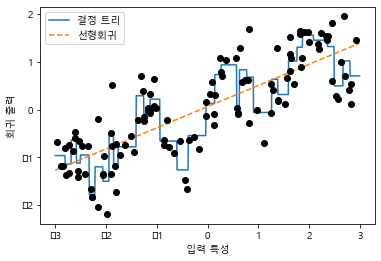

In [19]:
#구간 분할
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label='결정 트리')

reg = LinearRegression().fit(X,y)
plt.plot(line,reg.predict(line),'--', label='선형회귀')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel("입력 특성")
plt.legend(loc='best')

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [21]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [22]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [23]:
kb = KBinsDiscretizer(n_bins =10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

선형 회귀의 테스트 점수:0.72
결정 트리의 테스트 점수:0.72


Text(0.5, 0, '입력 특성')

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


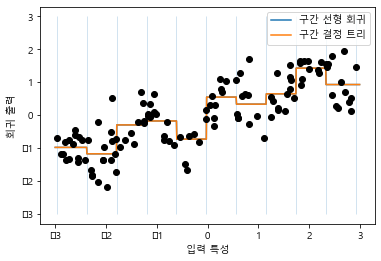

In [24]:
line_binned = kb.transform(line)

lreg = LinearRegression().fit(X_binned,y)
plt.plot(line,lreg.predict(line_binned), label='구간 선형 회귀')
print("선형 회귀의 테스트 점수:{:.2f}".format(lreg.score(X_binned,y)))

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
print("결정 트리의 테스트 점수:{:.2f}".format(dreg.score(X_binned,y)))
plt.plot(line, dreg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:,0],y,'o',c='k')
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')


In [25]:
#기존 데이터에서 추가(특성 개수 증가)
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(120, 11)


원본 특성을 더한 선형 회귀의 점수:0.728


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


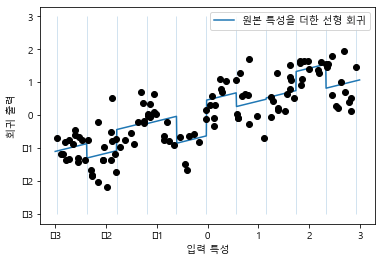

In [26]:
#선형모델 재적용
reg = LinearRegression().fit(X_combined,y)

line_combined = np.hstack([line,line_binned])
plt.plot(line,reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0],y,'o',c='k')
print("원본 특성을 더한 선형 회귀의 점수:{:.3f}".format(reg.score(X_combined,y)))

In [27]:
#구간 데이터 * 원본 데이터
X_product = np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(120, 20)


원본 특성을 곱한한 선형 회귀의 점수:0.787


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


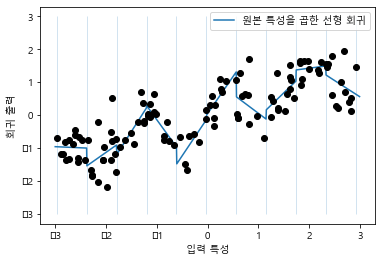

In [28]:
reg = LinearRegression().fit(X_product,y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product),label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1, alpha=.2)

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc='best')
print("원본 특성을 곱한한 선형 회귀의 점수:{:.3f}".format(reg.score(X_product,y)))

In [29]:
#다항식을 이용한 선형회귀
from sklearn.preprocessing import PolynomialFeatures

# x**10 까지 고차항을 추가합니다.
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가한다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [30]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [31]:
print("X원소 :\n", X[:5],'\n')
print("X_poly 원소\n", X_poly[:5])

X원소 :
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]] 

X_poly 원소
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [32]:
print("항 이름:\n", poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


다항식 선형 회귀의 점수:0.735


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


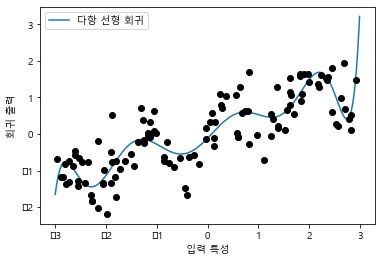

In [33]:
reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly),label='다항 선형 회귀')
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel('입력 특성')
plt.legend(loc='best')
print("다항식 선형 회귀의 점수:{:.3f}".format(reg.score(X_poly,y)))

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


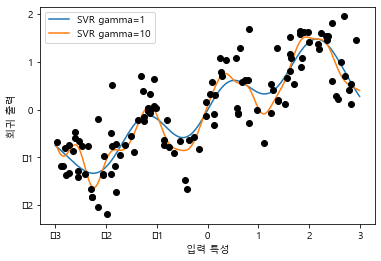

In [34]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel('입력 특성')
plt.legend(loc='best')

In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train,X_test,y_train,y_test = train_test_split(boston.data, boston.target, random_state=0)

#데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
#2차원 다항식 이용
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:",X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [37]:
#다항식이 2차원 일때 특성은 [1,a,b,a^2,b^2,ab]이다. 따라서 절편이 105개가 나오게 된다.
print("다항 특성 이름:\n",poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [38]:
from sklearn.linear_model import Ridge
ridge =  Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수:{:.3f}".format(ridge.score(X_test_scaled,y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수:{:.3f}".format(ridge.score(X_test_poly,y_test)))

상호작용 특성이 없을 때 점수:0.621
상호작용 특성이 있을 때 점수:0.753


In [39]:
#선형 모델은 점수가 향상되는 반면 트리 모델은 오히려 떨어지는 모습을 보여주었다.
#트리는 이미 자체가 정교한 모델이기 때문에 상호작용이 잘 반영되지 않는다.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수:{:.3f}".format(rf.score(X_test_scaled,y_test)))

rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly,y_train)
print('상호작용 특성이 있을 때 점수:{:.3f}'.format(rf.score(X_test_poly,y_test)))

상호작용 특성이 없을 때 점수:0.795
상호작용 특성이 있을 때 점수:0.775


In [40]:
#데이터 변환
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3)) #normal dist. 데이터 1000by 3
w = rnd.normal(size=3)

X = rnd.poisson(10*np.exp(X_org)) #포아송 분포 데이터 생성
y=np.dot(X_org,w) #원 데이터와 w로 y값 생성
print(X[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


In [41]:
print("특성 출연 횟수:\n",np.bincount(X[:,0])) #시작은 0부터다.

특성 출연 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

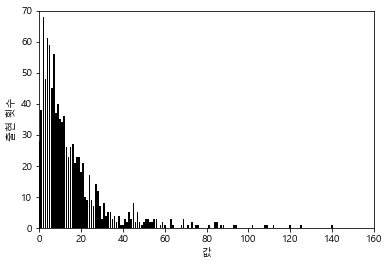

In [42]:
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins,color='black')
plt.ylabel("출현 횟수")
plt.xlabel('값')

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)
score = Ridge().fit(X_train,y_train).score(X_test,y_test)

print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.622


In [44]:
#데이터 전처리 하기, X = log(X+1)로 변경

X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test+1)

Text(0.5, 0, '값')

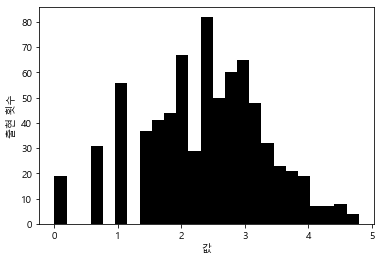

In [45]:
#분포가 덜 치우치며 큰 값의 이상치가 줄어든 것을 확인할 수 있다.
plt.hist(X_train_log[:,0], bins=25, color='black')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [46]:
#다시 Ridge 모델 적용하기
#점수가 훨씬 좋아진 것을 확인할 수 있다.
score = Ridge().fit(X_train_log,y_train).score(X_test_log,y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.875


In [47]:
#일변량 통계
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif

cancer = load_breast_cancer()

#고정된 난수 발생시키기
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
#데이터에 노이즈 특성을 추가한다.
#처음 30개는 원본 특성이고 다음 50개는 노이즈이다.
X_w_noise = np.hstack([cancer.data, noise])

X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,random_state=0, test_size=.5)
#f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택한다.
select = SelectPercentile(score_func = f_classif, percentile=50)
select.fit(X_train,y_train)

#훈련 세트에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selectd.shape: ", X_train_selected.shape)

#특성의 개수가 원본의 50퍼센트로 줄은 것을 확인할 수 있다.

X_train.shape: (284, 80)
X_train_selectd.shape:  (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x1cf1fa80520>], [Text(0, 0, '')])

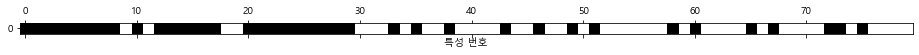

In [48]:
#어떤 특성이 선택되었는지 확인해보기.
#그래프에서 볼 수 있듯이 선택된 특성 대부분은 원본 특성이고 노이즈 특성이 거의 모두 제거되었다.
mask = select.get_support()
print(mask)

#True는 검은색, False는 흰색으로 마스킹한다.
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [49]:
X_test_selected = select.transform(X_test)

#max_iter = 500,1010으로 해주면 책과 똑같은 결과값이 나온다.
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)
print("전체 특성을 사용한 점수:{:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected,y_train)
print("선택된 일부 특성을 사용한 점수:{:.3f}".format(lr.score(X_test_selected,y_test)))

전체 특성을 사용한 점수:0.947
선택된 일부 특성을 사용한 점수:0.933


In [50]:
#모델 기반 특성 선택
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100,random_state=42), threshold='median')#특징 선택의 임계값: 특징 중요도의 중간값
#트리 100개로 특징 선택
#일변량 분석보다 더 복잡한 모델이 만들어진다.

In [51]:
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:",X_train.shape)
print("X_train_l1.shape:",X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, '특성 번호')

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


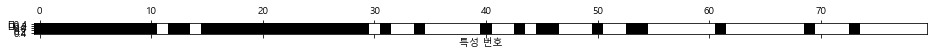

In [52]:
mask = select.get_support()
#True=black, Flase = white
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("특성 번호")

In [53]:
#책과 같은 점수는 max_iter = 1000. 책과의 차이는 무엇일까
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1,y_train).score(X_test_l1,y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.947


Text(0.5, 0, '특성 번호')

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


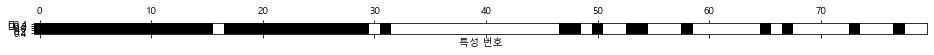

In [54]:
#반복적 특성 선택
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=40)

select.fit(X_train,y_train)
#선택된 특성 표시하기
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("특성 번호")

In [55]:
#반복적 모델은 특성이 누락될 때마다 다시 학습하므로 40번(n_features_to_select=40)이나 다시 실행된다.
#그래서 다른 두 모델보다 시간이 더 걸리게 된다.
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

#0.951 왜안나오지? C값까지 조정해주면 똑같이 나오게된다.
score = LogisticRegression(C=0.2,max_iter=10000).fit(X_train_rfe,y_train).score(X_test_rfe,y_test)
print("선형 회귀 테스트 점수:{:.3f}".format(score))

선형 회귀 테스트 점수:0.951


In [56]:
#선형회귀도 특성을 잘 선택해주면 렌덤포레스트 만큼의 성능을 낼 수 있다.
print("랜덤 포레스트 테스트 점수:{:.3f}".format(select.score(X_test,y_test)))

랜덤 포레스트 테스트 점수:0.951


In [57]:
#전문가 지식 활용
#2015년 8월의 자전거 대여소 데이터 읽기
citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터:\n",citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

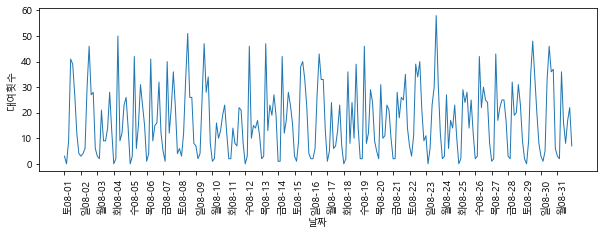

In [58]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start = citibike.index.min(), end=citibike.index.max(),freq='D')
week = ['일','월','화','수','목','금','토']
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime('%w'),xticks.strftime('%m-%d'))]
plt.xticks(xticks, xticks_name, rotation=90, ha='left')
plt.plot(citibike,linewidth=1)
plt.xlabel('날짜')
plt.ylabel('대여횟수')

In [59]:
#타깃값 추출(대여 횟수)
y = citibike.values
#POSIX 시간을 10**9로 나누어 반환
#//는 나눈 후 소수점 부분은 버리고 정수 부분만 취한다.
X = citibike.index.astype('int64').values.reshape(-1,1)//10**9

In [60]:
#처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용한다.
n_train = 184

#주어진 특성을 사용하여 평가하고 그래프를 만든다.
def eval_on_features(features,target,regressor):
    #훈련 세트와 테스트 세트로 나눈다.
    X_train,X_test = features[:n_train], features[n_train:]
    #타깃값도 나눈다.
    y_train,y_test = target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2:{:.2f}".format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0,len(X),8), xticks_name, rotation=90, ha='left')
    
    plt.plot(range(n_train),y_train,label='훈련')
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label='테스트')
    plt.plot(range(n_train),y_pred_train,'--',label='훈련 예측')
    
    plt.plot(range(n_train, len(y_test)+n_train), y_pred, '--',label='테스트 예측')
    plt.legend(loc=(1.01,0))
    plt.xlabel('날짜')
    plt.ylabel('대여횟수')

테스트 세트 R^2:-0.04


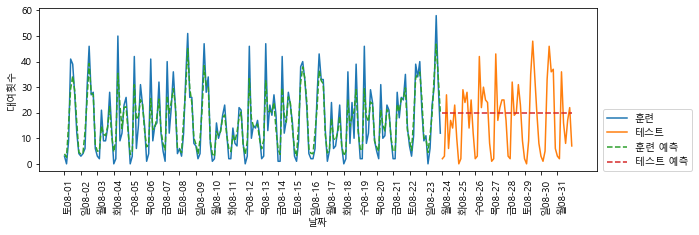

In [61]:
#거의 학습되지 않았다.
#시계열 데이터라 랜덤 포레스트가 외삽이 되지않아 예측을 못하였다.
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X,y,regressor)

테스트 세트 R^2:0.60


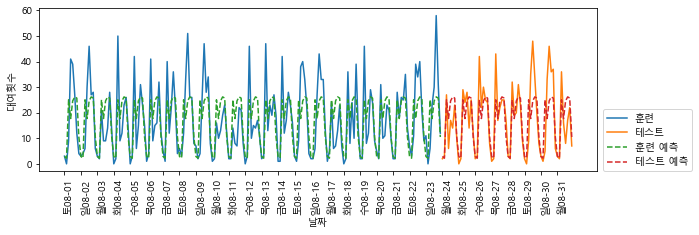

In [62]:
#입력값을 시간으로 변경
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour,y,regressor)

테스트 세트 R^2:0.84


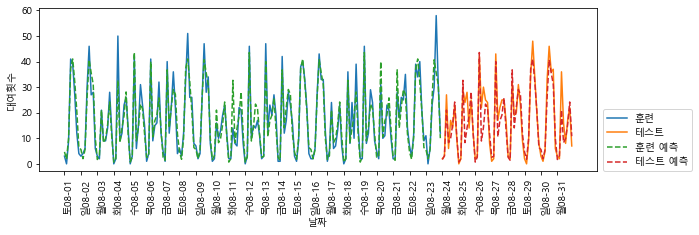

In [63]:
#시간 요일 특성으로 예측, 요일과 시간의 조합을 데이터로 사용
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

테스트 세트 R^2:0.13


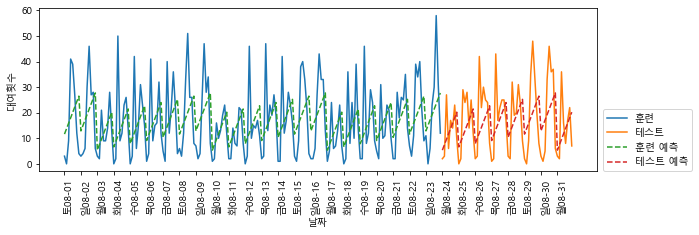

In [64]:
#선형모델로 예측해보기
#잘못 학습해서 데이터를 전처리해준다.
eval_on_features(X_hour_week,y,LinearRegression())

테스트 세트 R^2:0.62


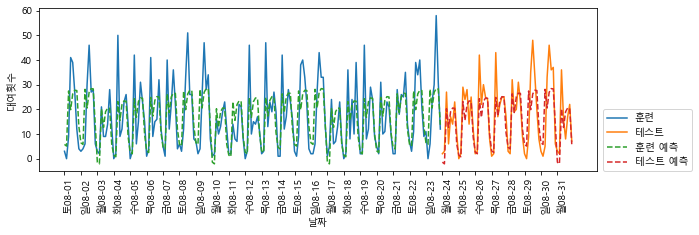

In [65]:
#구간을 나눠준다. 7개 요일과 8개 시간구간을 나눠줌으로써 15개의 특징이 생겼다.
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot,y,Ridge())

테스트 세트 R^2:0.85


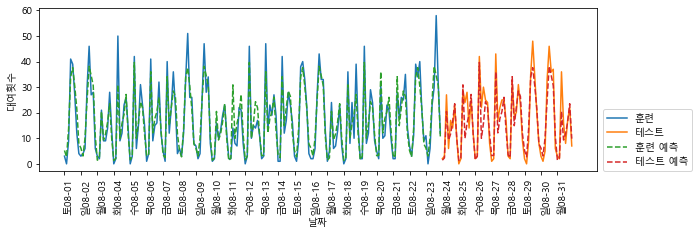

In [67]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly,y,lr)

In [68]:
hour = ["%02d:00" %i for i in range(0,24,3)]
day = ['월','화','수','목','금','토','일']
features = day+hour

In [69]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_!=0]

Text(0, 0.5, '계수 크기')

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


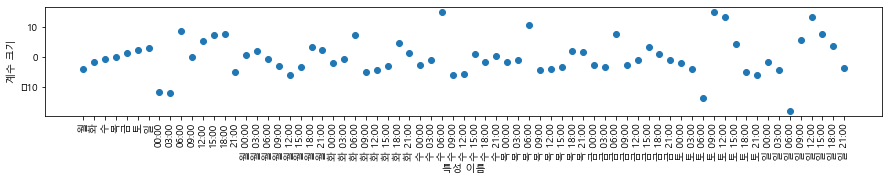

In [70]:
#선형 모델에서 학습한 계수 플롯에 나타내기
plt.figure(figsize=(15,2))
plt.plot(coef_nonzero,'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero,rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")